In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

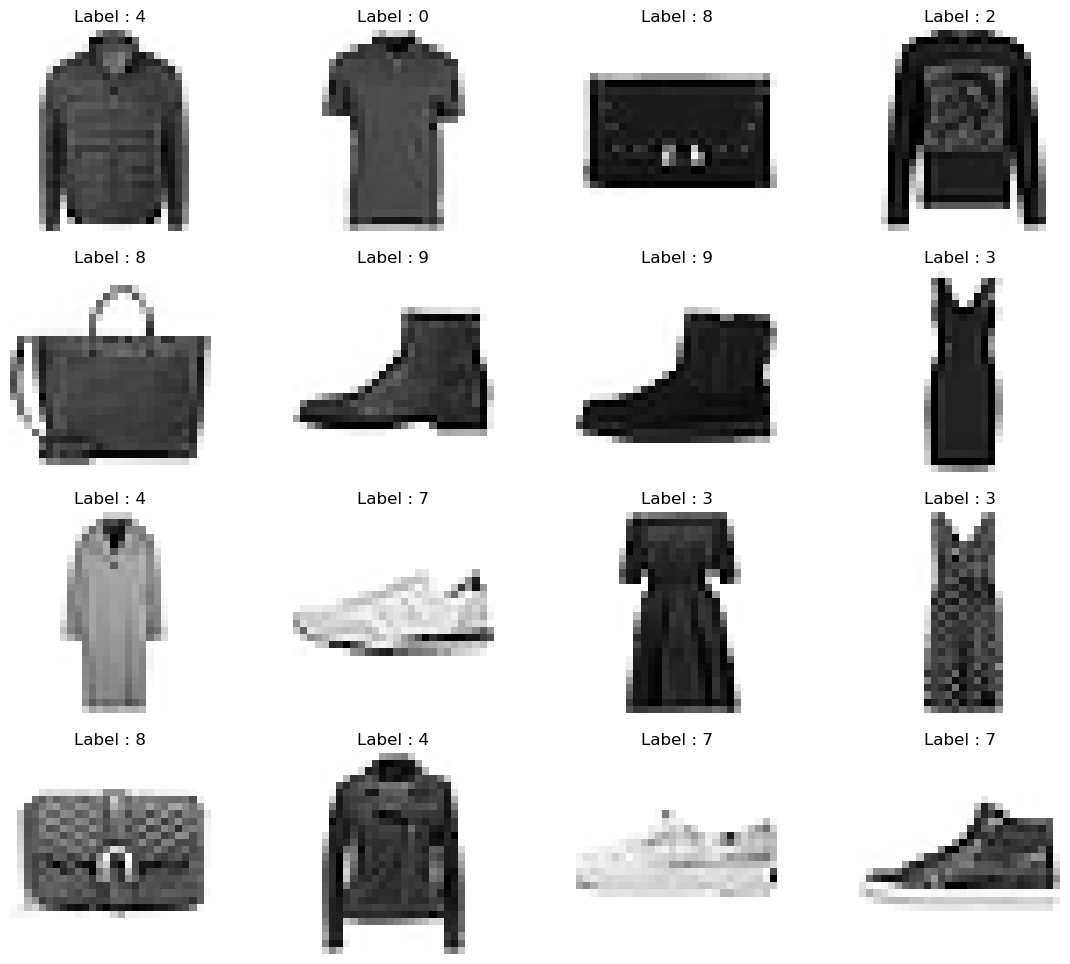

In [2]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title('Label : '+str(y_train[n]))
    plt.axis('off')

plt.show()

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 0.4805 - accuracy: 0.8301 - val_loss: 0.4130 - val_accuracy: 0.8499
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.3619 - accuracy: 0.8674 - val_loss: 0.3963 - val_accuracy: 0.8599
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3199 - accuracy: 0.8833 - val_loss: 0.3616 - val_accuracy: 0.8668
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2978 - accuracy: 0.8898 - val_loss: 0.3497 - val_accuracy: 0.8765
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2768 - accuracy: 0.8984 - val_loss: 0.3283 - val_accuracy: 0.8803
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2679 - accuracy: 0.9012 - val_loss: 0.3399 - val_accuracy: 0.8818
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2505 - accuracy: 0.9071 - val_loss: 0.3351 - val_accuracy: 0.8827
Epoch 

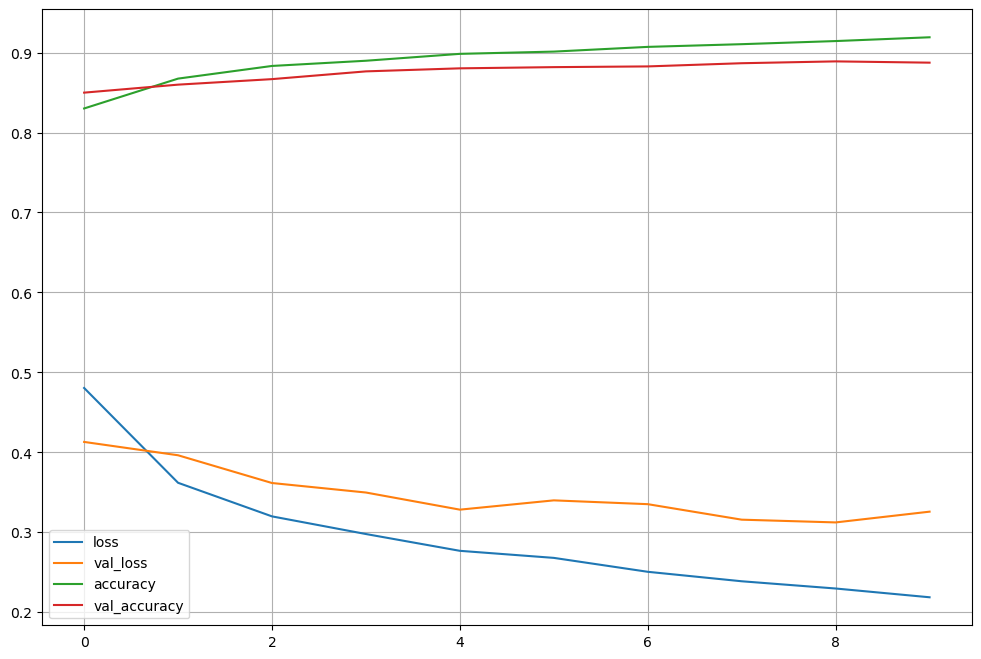

In [6]:
import matplotlib.pyplot as plt
### pyplot작업 시 커널 죽을 때
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8874


[0.3257579803466797, 0.8873999714851379]

In [11]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
print('Predict num :', predicted_labels[:10])
print('Real num :   ',y_test[:10])

313/313 [==============================] - 1s 2ms/step
Predict num : [9 2 1 1 6 1 4 6 5 7]
Real num :    [9 2 1 1 6 1 4 6 5 7]


In [12]:
wrong_result = []

for n in range(0,len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1126

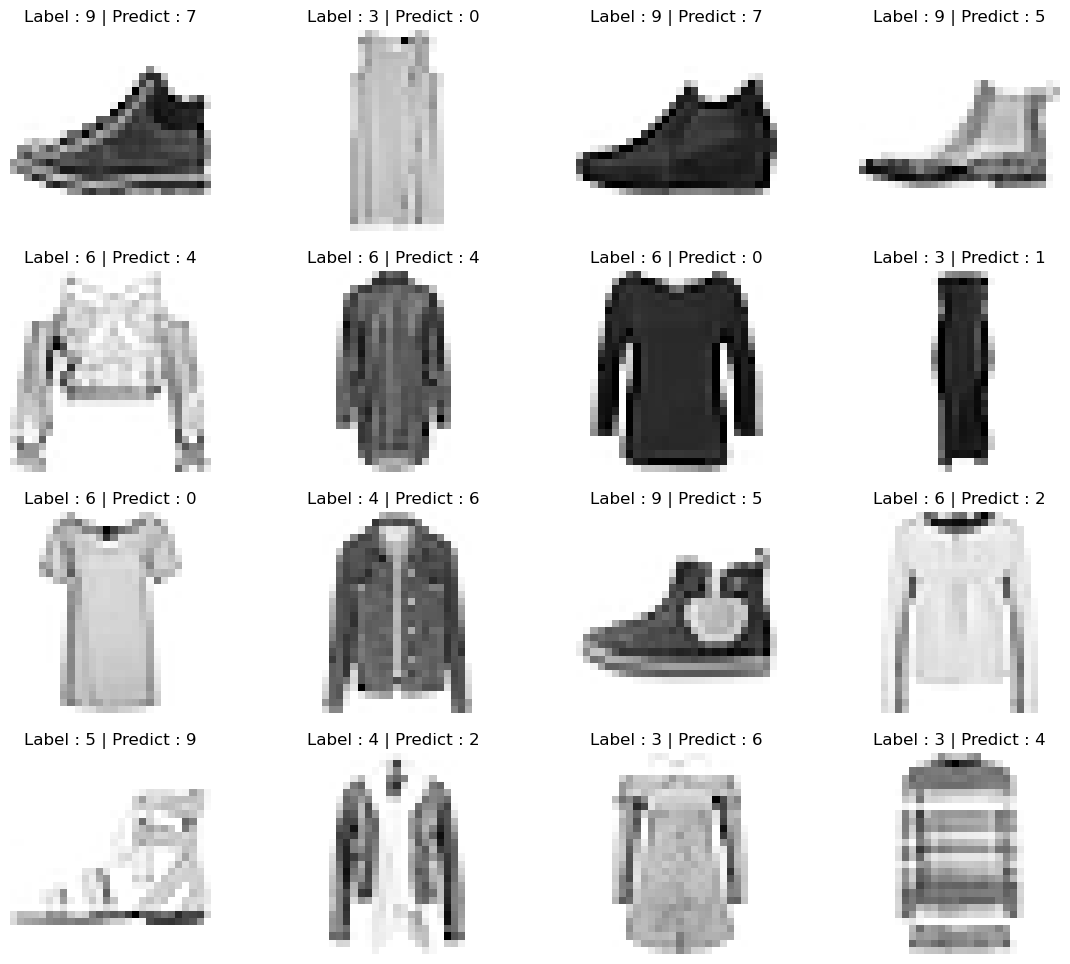

In [14]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label : '+str(y_test[n]) + ' | Predict : '+ str(predicted_labels[n]))
    plt.axis('off')

plt.show()